In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/maxwell.arff.csv")



max_corr_features =['SizeFP','Nlan','T01','T07','T08','T09','T10','T11','T15']

x = np.array(dataset[max_corr_features])
y = np.array(dataset['Effort'])

In [3]:
y.shape

(62,)

In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(62,1))
y=scaler.fit_transform(y)

In [5]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=35) 

In [6]:

from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0)
regr.fit(X_train,y_train.ravel())
y_pred=regr.predict(X_test)
 
 
 

In [7]:
y.shape

(62, 1)

In [8]:
y_pred=np.reshape(y_pred,(13,1))
y_test=np.reshape(y_test,(13,1))

In [9]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [10]:
y_pred

array([[0.34881626],
       [0.09965973],
       [0.05869878],
       [0.05971738],
       [0.04769903],
       [0.10899195],
       [0.07724485],
       [0.05984694],
       [0.05971738],
       [0.08770042],
       [0.12826079],
       [0.10811705],
       [0.08770042]])

In [11]:
y_test

array([[0.21259368],
       [0.05488742],
       [0.01029931],
       [0.00602114],
       [0.01857046],
       [0.04780466],
       [0.08245789],
       [0.04526945],
       [0.01692257],
       [0.06296842],
       [0.13534883],
       [0.01925179],
       [0.018412  ]])

In [12]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [13]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.0035238619995793885

RMSE:
 0.05936212596916816

MAPE:
 228.1585504605438

SMAPE:
 79.26

 Adj R2 score:
 0.9351838625550534


In [14]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [15]:
y_test=np.reshape(y_test,(13,))
y_pred=np.reshape(y_pred,(13,))

In [16]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0         14000.0      22597.142857
1          4047.0       6872.625000
2          1233.0       4287.538462
3           963.0       4351.823529
4          1755.0       3593.333333
5          3600.0       7461.590909
6          5787.0       5458.000000
7          3440.0       4360.000000
8          1651.0       4351.823529
9          4557.0       6117.861111
10         9125.0       8677.666667
11         1798.0       7406.375000
12         1745.0       6117.861111


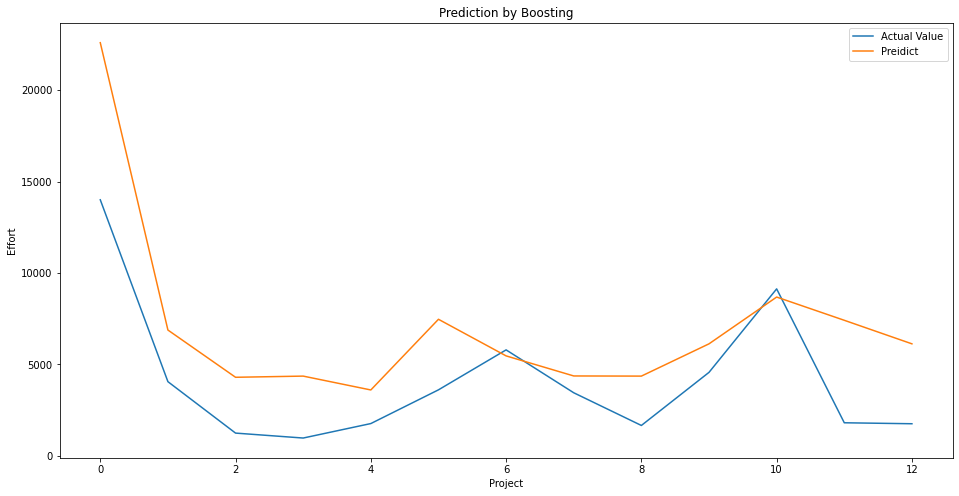

In [17]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Boosting")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()